# Tutorial: Display Gaia EDR3 sources

This notebook demonstrates that Gaia EDR3 sources are shown on the sky.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pickle as pkl
import warpfield as w

In [2]:
from astropy.coordinates import SkyCoord, Longitude, Latitude
import astropy.units as u

In [3]:
lon = Longitude(269.267, unit=u.degree)
lat = Latitude(-18.985, unit=u.degree)
pointing = SkyCoord(lon, lat, frame='icrs')

The retrieved Gaia EDR3 data are loaded from the pickled file.

In [4]:
with open('gaia_edr3.pkl','rb') as f:
    gaia_sources = pkl.load(f)

In [5]:
print(gaia_sources)

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    [(269.98167082, -18.57869516, 1224.69071274),
     (269.97802152, -18.57559889,  324.47533736),
     (269.9835042 , -18.56314468, 1386.3884802 ), ...,
     (268.95304902, -19.79798206, 1453.99297353),
     (268.94090109, -19.80146811, 1743.04794159),
     (268.94291844, -19.79621657,  961.61213642)]
 (pm_ra_cosdec, pm_dec) in mas / yr
    [( -3.47320156, -6.59719102), (-21.33238793, 19.44839316),
     (  2.41198999, -0.88761999), ..., ( -0.14121417,  4.28021171),
     ( -0.65096113, -8.71104282), ( -1.00190969,  0.6318477 )]>


Use `display_sources` function. The first argument is the center of the field of view. The second argument is the source list. The x-, and y-coordinates are specified by the coordinate frame of the first argument. Here, `pointing` is defined in the `icrs` frame. The figure is shown in the (RA, Dec) coordinates.

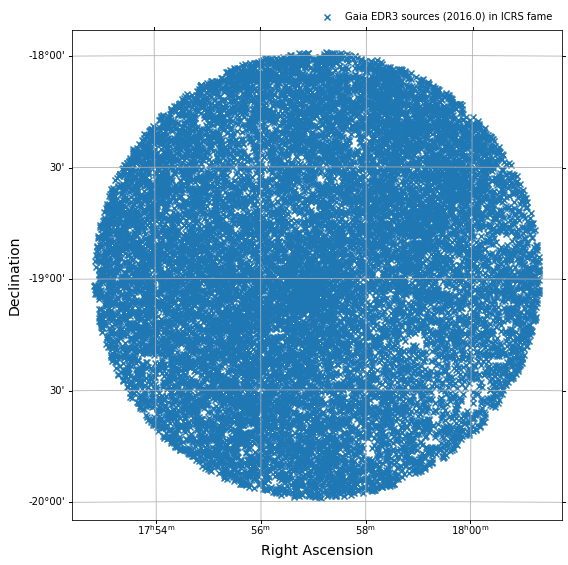

In [6]:
w.display_sources(pointing, gaia_sources, title="Gaia EDR3 sources (2016.0) in ICRS fame")

When the first argument is given in a different frame, the coordinates of the figure are changed accordingly. The `pointing` is converted into the `galactic` frame in the following example. The figure is shown in the (Glon, Glat) coordinates.

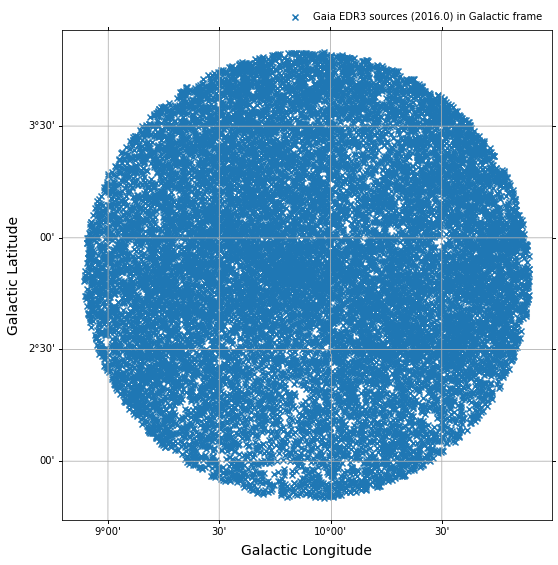

In [7]:
w.display_sources(pointing.galactic, gaia_sources, title="Gaia EDR3 sources (2016.0) in Galactic frame")